# Selección de comunas y criterios de descarte

## Carga de datos

In [63]:
import pandas as pd
# Paso 1: Cargar los datos de estadísticas por comuna y rango de superficie
data_estadisticos_pivot = pd.read_csv('data recuperada/estadisticos_por_comuna_y_rango_pivot.csv')
data_estadisticos = pd.read_csv('data recuperada/estadisticos_por_comuna_y_rango.csv')

In [5]:
data_estadisticos_pivot.columns

Index(['comuna_match', 'Total de Datos_2021S1', 'Total de Datos_2021S2',
       'Total de Datos_2022S1', 'Total de Datos_2022S2',
       'Total de Datos_2023S1', 'Total de Datos_2023S2',
       'Total de Datos_2024S1', 'Total de Datos_2024S2',
       'Total 100-499 m2_2021S1',
       ...
       'Mínimo costo_m2_uf >100000 m2_2024S1',
       'Mínimo costo_m2_uf >100000 m2_2024S2',
       'Máximo costo_m2_uf >100000 m2_2021S1',
       'Máximo costo_m2_uf >100000 m2_2021S2',
       'Máximo costo_m2_uf >100000 m2_2022S1',
       'Máximo costo_m2_uf >100000 m2_2022S2',
       'Máximo costo_m2_uf >100000 m2_2023S1',
       'Máximo costo_m2_uf >100000 m2_2023S2',
       'Máximo costo_m2_uf >100000 m2_2024S1',
       'Máximo costo_m2_uf >100000 m2_2024S2'],
      dtype='object', length=289)

In [7]:
data_estadisticos.columns

Index(['comuna_match', 'Total de Datos', 'Total 100-499 m2', '% 100-499 m2',
       'Total 500-4999 m2', '% 500-4999 m2', 'Total 5000-10000 m2',
       '% 5000-10000 m2', 'Total 10001-100000 m2', '% 10001-100000 m2',
       'Total >100000 m2', '% >100000 m2', 'Mediana costo_m2_uf 100-499 m2',
       'Media costo_m2_uf 100-499 m2', 'Desviación costo_m2_uf 100-499 m2',
       'Mínimo costo_m2_uf 100-499 m2', 'Máximo costo_m2_uf 100-499 m2',
       'IQR costo_m2_uf 100-499 m2', 'Mediana costo_m2_uf 500-4999 m2',
       'Media costo_m2_uf 500-4999 m2', 'Desviación costo_m2_uf 500-4999 m2',
       'Mínimo costo_m2_uf 500-4999 m2', 'Máximo costo_m2_uf 500-4999 m2',
       'IQR costo_m2_uf 500-4999 m2', 'Mediana costo_m2_uf 5000-10000 m2',
       'Media costo_m2_uf 5000-10000 m2',
       'Desviación costo_m2_uf 5000-10000 m2',
       'Mínimo costo_m2_uf 5000-10000 m2', 'Máximo costo_m2_uf 5000-10000 m2',
       'IQR costo_m2_uf 5000-10000 m2', 'Mediana costo_m2_uf 10001-100000 m2',
       'Me

In [64]:
import pandas as pd

# Cargar las datas originales
# data_estadisticos = pd.read_csv("ruta_a_data_estadisticos.csv")
# data_estadisticos_pivot = pd.read_csv("ruta_a_data_estadisticos_pivot.csv")

# Seleccionar las columnas que queremos agregar de data_estadisticos
columnas_a_agregar = [
    'comuna_match', 'Total de Datos', 'Total 100-499 m2', '% 100-499 m2',
    'Total 500-4999 m2', '% 500-4999 m2', 'Total 5000-10000 m2', '% 5000-10000 m2',
    'Total 10001-100000 m2', '% 10001-100000 m2', 'Total >100000 m2', '% >100000 m2',
    'Mediana costo_m2_uf 100-499 m2', 'Mediana costo_m2_uf 500-4999 m2', 
    'Mediana costo_m2_uf 5000-10000 m2', 'Mediana costo_m2_uf 10001-100000 m2', 
    'Mediana costo_m2_uf >100000 m2'
]

# Realizar el merge, agregando las columnas seleccionadas de data_estadisticos a data_estadisticos_pivot
data_estadisticos_pivot = data_estadisticos_pivot.merge(
    data_estadisticos[columnas_a_agregar],
    on='comuna_match',
    how='left'
)

# Guardar el resultado final si es necesario
# data_estadisticos_pivot.to_csv("ruta_a_data_estadisticos_pivot_actualizado.csv", index=False)

# Mostrar una muestra de los resultados
print(data_estadisticos_pivot.head())


      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

## Filtro de oferta menor a 200 en 2023 y 2024

In [65]:
# Calcular la suma de los totales de datos para el 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['Suma_Datos_2023_2024S1'] = (
    data_estadisticos_pivot['Total de Datos_2023S1'] +
    data_estadisticos_pivot['Total de Datos_2023S2'] +
    data_estadisticos_pivot['Total de Datos_2024S1']
)

# Filtrar comunas según la condición de que la suma sea mayor a 100
data_principal = data_estadisticos_pivot[data_estadisticos_pivot['Suma_Datos_2023_2024S1'] >= 200].copy()
data_excluida = data_estadisticos_pivot[data_estadisticos_pivot['Suma_Datos_2023_2024S1'] < 200].copy()

# Eliminar la columna de suma temporal de ambas dataframes si no es necesaria
#data_principal.drop(columns=['Suma_Datos_2023_2024S1'], inplace=True)
#data_excluida.drop(columns=['Suma_Datos_2023_2024S1'], inplace=True)

# Guardar las dataframes en archivos CSV
#data_principal.to_csv('data_principal.csv', index=False)
#data_excluida.to_csv('data_excluida.csv', index=False)

# Mostrar una muestra de los resultados
print("Data Principal (oferta > 100 en 2023S1 + 2023S2 + 2024S1):")
print(data_principal.head())

print("\nData Excluida (oferta <= 100 en 2023S1 + 2023S2 + 2024S1):")
print(data_excluida.head())

# Mostrar el número de comunas en cada conjunto
print(f"\nNúmero de comunas en data_principal (oferta >= 200): {data_principal.shape[0]}")
print(f"Número de comunas en data_excluida (oferta < 200): {data_excluida.shape[0]}")


Data Principal (oferta > 100 en 2023S1 + 2023S2 + 2024S1):
   comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0     ALGARROBO                  142.0                  149.0   
5         ANCUD                  182.0                  222.0   
9   ANTOFAGASTA                   81.0                   83.0   
13        AYSEN                   97.0                   85.0   
14         BUIN                  109.0                  111.0   

    Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                   167.0                  233.0                  244.0   
5                   181.0                  306.0                  199.0   
9                    79.0                  119.0                  110.0   
13                   80.0                  164.0                   99.0   
14                  110.0                  122.0                  142.0   

    Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                   248.

In [66]:
# Definir el umbral de porcentaje de oferta deseado
umbral_porcentaje = 65

# Calcular el total de oferta en el rango 5000-10000 m2 para el periodo 2023S1, 2023S2, y 2024S1 en data_principal
data_principal['Oferta_5000_10000_2023_2024S1'] = (
    data_principal['Total 5000-10000 m2_2023S1'] +
    data_principal['Total 5000-10000 m2_2023S2'] +
    data_principal['Total 5000-10000 m2_2024S1']
)

# Calcular el porcentaje de la oferta en el rango 5000-10000 m2 sobre el total de oferta en 2023S1, 2023S2, y 2024S1
data_principal['% Oferta 5000-10000 m2 2023_2024S1'] = (
    data_principal['Oferta_5000_10000_2023_2024S1'] / data_principal['Suma_Datos_2023_2024S1'] * 100
)

# Crear la columna binaria para indicar si cumple con el umbral de oferta en el rango 5000-10000 m2
data_principal['Cumple_65%_5000_10000'] = (data_principal['% Oferta 5000-10000 m2 2023_2024S1'] >= umbral_porcentaje).astype(int)

# Imprimir el número de comunas que cumplen o no cumplen con el criterio
num_cumple = data_principal['Cumple_65%_5000_10000'].sum()
num_no_cumple = data_principal.shape[0] - num_cumple

print(f"Número de comunas que cumplen con el {umbral_porcentaje}% de oferta en el rango 5000-10000 m2: {num_cumple}")
print(f"Número de comunas que no cumplen con el {umbral_porcentaje}% de oferta en el rango 5000-10000 m2: {num_no_cumple}")

# Mostrar una muestra de los resultados
print(data_principal[['comuna_match', '% Oferta 5000-10000 m2 2023_2024S1', 'Cumple_65%_5000_10000']].head())


Número de comunas que cumplen con el 65% de oferta en el rango 5000-10000 m2: 28
Número de comunas que no cumplen con el 65% de oferta en el rango 5000-10000 m2: 100
   comuna_match  % Oferta 5000-10000 m2 2023_2024S1  Cumple_65%_5000_10000
0     ALGARROBO                           48.609432                      0
5         ANCUD                           66.442953                      1
9   ANTOFAGASTA                           16.541353                      0
13        AYSEN                           41.764706                      0
14         BUIN                           40.229885                      0


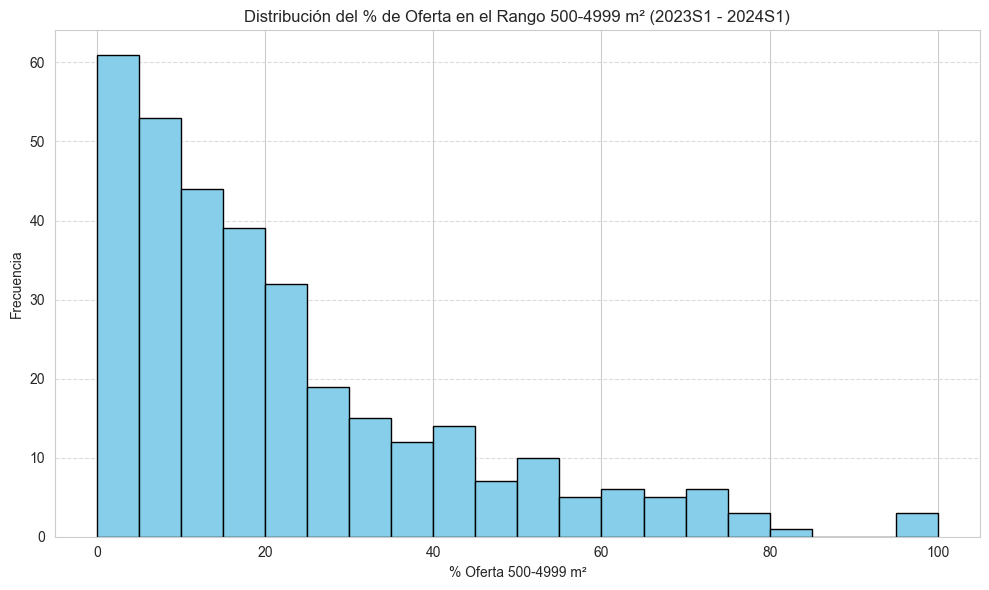

In [67]:
import matplotlib.pyplot as plt

# Calcular el total de oferta en el rango 500-4999 m² para el periodo 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['Oferta_500_4999_2023_2024S1'] = (
    data_estadisticos_pivot['Total 500-4999 m2_2023S1'] +
    data_estadisticos_pivot['Total 500-4999 m2_2023S2'] +
    data_estadisticos_pivot['Total 500-4999 m2_2024S1']
)

# Calcular el porcentaje de oferta en el rango 500-4999 m² sobre el total de oferta en 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['% Oferta 500-4999 m2 2023_2024S1'] = (
    data_estadisticos_pivot['Oferta_500_4999_2023_2024S1'] / data_estadisticos_pivot['Suma_Datos_2023_2024S1'] * 100
)

# Graficar la distribución del porcentaje de oferta en el rango 500-4999 m²
plt.figure(figsize=(10, 6))
plt.hist(data_estadisticos_pivot['% Oferta 500-4999 m2 2023_2024S1'].dropna(), bins=20, edgecolor='k', color='skyblue')
plt.title('Distribución del % de Oferta en el Rango 500-4999 m² (2023S1 - 2024S1)')
plt.xlabel('% Oferta 500-4999 m²')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


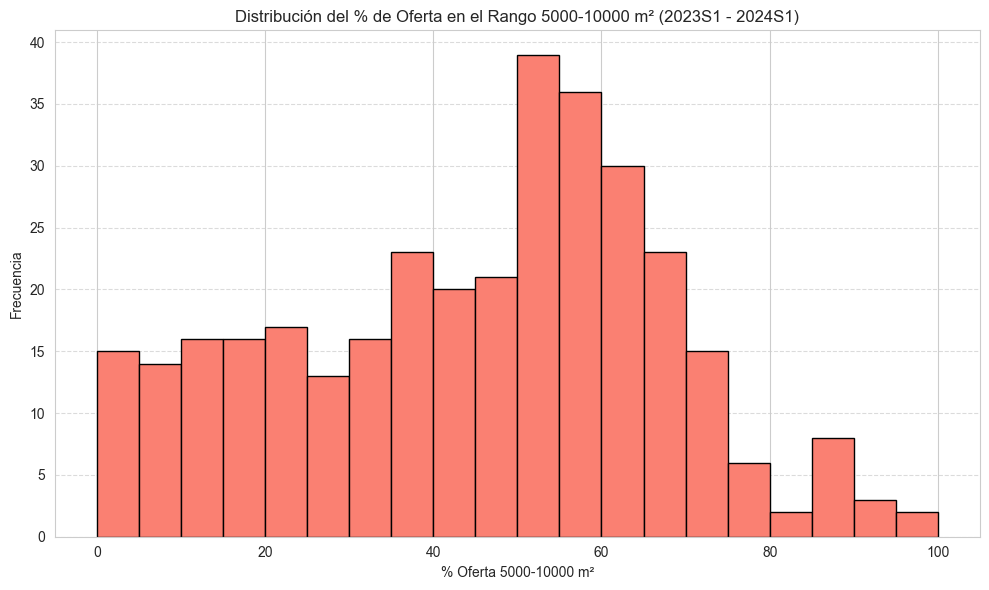

In [68]:
# Calcular el total de oferta en el rango 5000-10000 m² para el periodo 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['Oferta_5000_10000_2023_2024S1'] = (
    data_estadisticos_pivot['Total 5000-10000 m2_2023S1'] +
    data_estadisticos_pivot['Total 5000-10000 m2_2023S2'] +
    data_estadisticos_pivot['Total 5000-10000 m2_2024S1']
)

# Calcular el porcentaje de oferta en el rango 5000-10000 m² sobre el total de oferta en 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['% Oferta 5000-10000 m2 2023_2024S1'] = (
    data_estadisticos_pivot['Oferta_5000_10000_2023_2024S1'] / data_estadisticos_pivot['Suma_Datos_2023_2024S1'] * 100
)

# Graficar la distribución del porcentaje de oferta en el rango 5000-10000 m²
plt.figure(figsize=(10, 6))
plt.hist(data_estadisticos_pivot['% Oferta 5000-10000 m2 2023_2024S1'].dropna(), bins=20, edgecolor='k', color='salmon')
plt.title('Distribución del % de Oferta en el Rango 5000-10000 m² (2023S1 - 2024S1)')
plt.xlabel('% Oferta 5000-10000 m²')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


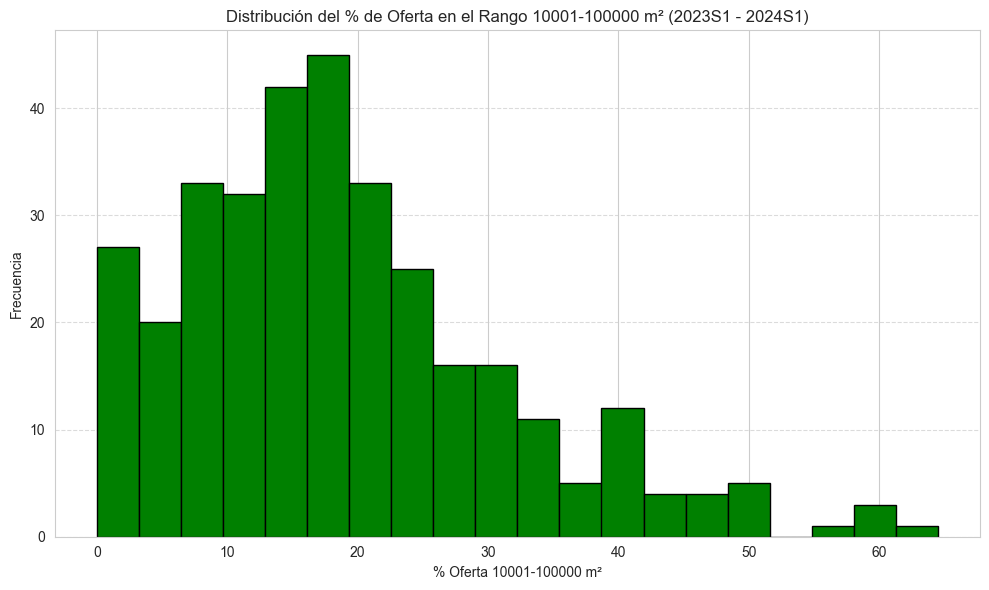

In [69]:

# Calcular el total de oferta en el rango 5000-10000 m² para el periodo 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['Oferta_10001_100000_2023_2024S1'] = (
        data_estadisticos_pivot['Total 10001-100000 m2_2023S1'] +
        data_estadisticos_pivot['Total 10001-100000 m2_2023S2'] +
        data_estadisticos_pivot['Total 10001-100000 m2_2024S1']
)

# Calcular el porcentaje de oferta en el rango 5000-10000 m² sobre el total de oferta en 2023S1, 2023S2 y 2024S1
data_estadisticos_pivot['% Oferta 10001-100000 m2 2023_2024S1'] = (
        data_estadisticos_pivot['Oferta_10001_100000_2023_2024S1'] / data_estadisticos_pivot[
    'Suma_Datos_2023_2024S1'] * 100
)

# Graficar la distribución del porcentaje de oferta en el rango 5000-10000 m²
plt.figure(figsize=(10, 6))
plt.hist(data_estadisticos_pivot['% Oferta 10001-100000 m2 2023_2024S1'].dropna(), bins=20, edgecolor='k', color='green')
plt.title('Distribución del % de Oferta en el Rango 10001-100000 m² (2023S1 - 2024S1)')
plt.xlabel('% Oferta 10001-100000 m²')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

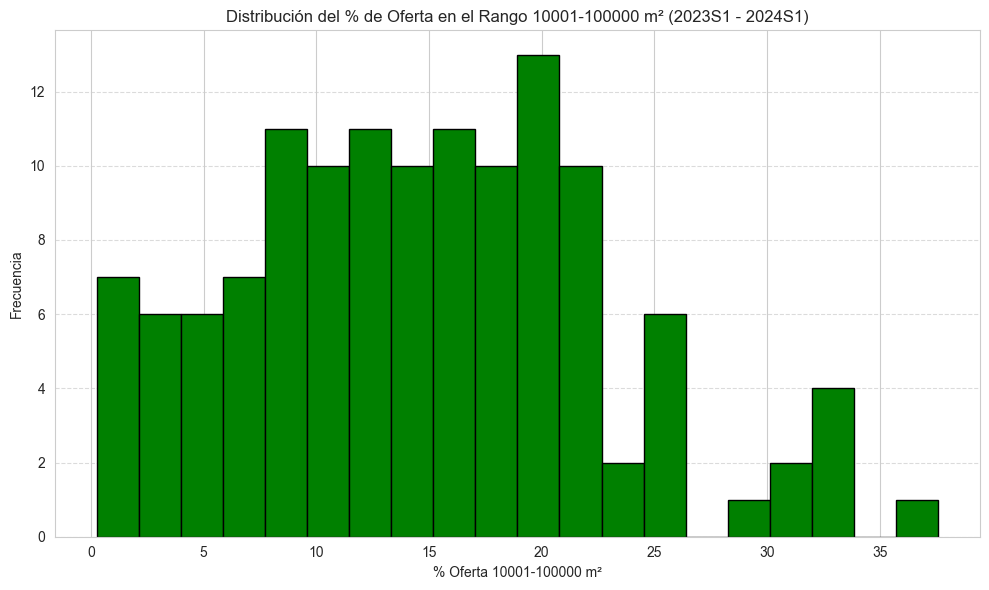

In [70]:

# Calcular el total de oferta en el rango 5000-10000 m² para el periodo 2023S1, 2023S2 y 2024S1
data_principal['Oferta_10001_100000_2023_2024S1'] = (
        data_principal['Total 10001-100000 m2_2023S1'] +
        data_principal['Total 10001-100000 m2_2023S2'] +
        data_principal['Total 10001-100000 m2_2024S1']
)

# Calcular el porcentaje de oferta en el rango 5000-10000 m² sobre el total de oferta en 2023S1, 2023S2 y 2024S1
data_principal['% Oferta 10001-100000 m2 2023_2024S1'] = (
        data_principal['Oferta_10001_100000_2023_2024S1'] / data_principal[
    'Suma_Datos_2023_2024S1'] * 100
)

# Graficar la distribución del porcentaje de oferta en el rango 5000-10000 m²
plt.figure(figsize=(10, 6))
plt.hist(data_principal['% Oferta 10001-100000 m2 2023_2024S1'].dropna(), bins=20, edgecolor='k', color='green')
plt.title('Distribución del % de Oferta en el Rango 10001-100000 m² (2023S1 - 2024S1)')
plt.xlabel('% Oferta 10001-100000 m²')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [71]:

# Definir el umbral de porcentaje de oferta deseado
umbral_porcentaje = 5

# Calcular el total de oferta en el rango 5000-10000 m2 para el periodo 2023S1, 2023S2, y 2024S1 en data_principal
data_principal['Oferta_10001_100000_2023_2024S1'] = (
        data_principal['Total 10001-100000 m2_2023S1'] +
        data_principal['Total 10001-100000 m2_2023S2'] +
        data_principal['Total 10001-100000 m2_2024S1']
)

# Calcular el porcentaje de la oferta en el rango 5000-10000 m2 sobre el total de oferta en 2023S1, 2023S2, y 2024S1
data_principal['% Oferta 10001-100000 m2 2023_2024S1'] = (
        data_principal['Oferta_10001_100000_2023_2024S1'] / data_principal['Suma_Datos_2023_2024S1'] * 100
)

# Crear la columna binaria para indicar si cumple con el umbral de oferta en el rango 5000-10000 m2
data_principal['Cumple_5%_10001_100000'] = (
            data_principal['% Oferta 10001-100000 m2 2023_2024S1'] >= umbral_porcentaje).astype(int)

# Imprimir el número de comunas que cumplen o no cumplen con el criterio
num_cumple = data_principal['Cumple_5%_10001_100000'].sum()
num_no_cumple = data_principal.shape[0] - num_cumple

print(f"Número de comunas que cumplen con el {umbral_porcentaje}% de oferta en el rango 10001-100000 m2: {num_cumple}")
print(
    f"Número de comunas que no cumplen con el {umbral_porcentaje}% de oferta en el rango 10001-100000 m2: {num_no_cumple}")

# Mostrar una muestra de los resultados
print(data_principal[['comuna_match', '% Oferta 10001-100000 m2 2023_2024S1', 'Cumple_5%_10001_100000']].head())

Número de comunas que cumplen con el 5% de oferta en el rango 10001-100000 m2: 111
Número de comunas que no cumplen con el 5% de oferta en el rango 10001-100000 m2: 17
   comuna_match  % Oferta 10001-100000 m2 2023_2024S1  Cumple_5%_10001_100000
0     ALGARROBO                             17.775091                       1
5         ANCUD                             20.637584                       1
9   ANTOFAGASTA                             10.776942                       1
13        AYSEN                             32.058824                       1
14         BUIN                             19.310345                       1


In [72]:
# Filtrar las comunas que cumplen con ambas condiciones
comunas_cumplen_ambas = data_principal[
    (data_principal['% Oferta 10001-100000 m2 2023_2024S1'] > 5) &
    (data_principal['% Oferta 5000-10000 m2 2023_2024S1'] < 65)
]

# Contar el número de comunas que cumplen ambas condiciones
num_comunas_cumplen_ambas = comunas_cumplen_ambas.shape[0]

print(f"Número de comunas que tienen > 5% de oferta en el rango 10001-100000 m2 y < 65% en el rango 5000-10000 m2: {num_comunas_cumplen_ambas}")

# Mostrar una muestra de las comunas que cumplen ambas condiciones
print(comunas_cumplen_ambas[['comuna_match', '% Oferta 10001-100000 m2 2023_2024S1', '% Oferta 5000-10000 m2 2023_2024S1']].head())


Número de comunas que tienen > 5% de oferta en el rango 10001-100000 m2 y < 65% en el rango 5000-10000 m2: 87
   comuna_match  % Oferta 10001-100000 m2 2023_2024S1  \
0     ALGARROBO                             17.775091   
9   ANTOFAGASTA                             10.776942   
13        AYSEN                             32.058824   
14         BUIN                             19.310345   
20      CALBUCO                             30.844156   

    % Oferta 5000-10000 m2 2023_2024S1  
0                            48.609432  
9                            16.541353  
13                           41.764706  
14                           40.229885  
20                           56.168831  


In [73]:
comunas_cumplen_ambas.to_csv("data recuperada/sample.csv", index=False)

In [87]:
# Filtrar los datos de la comuna de QUINTERO
quintero_data = data_principal[data_principal['comuna_match'] == 'QUINTERO']

# Mostrar los valores específicos para QUINTERO en los rangos de interés
print("Datos de oferta para la comuna de QUINTERO:")
print(quintero_data[['comuna_match', '% Oferta 10001-100000 m2 2023_2024S1', '% Oferta 5000-10000 m2 2023_2024S1']])

# Verificar si cumple o no cumple con cada condición
cumple_10001_100000 = quintero_data['% Oferta 10001-100000 m2 2023_2024S1'].iloc[0] > 5
cumple_5000_10000 = quintero_data['% Oferta 5000-10000 m2 2023_2024S1'].iloc[0] < 65

print("\nCumple con el >5% en el rango 10001-100000 m²:", cumple_10001_100000)
print("Cumple con el <65% en el rango 5000-10000 m²:", cumple_5000_10000)


Datos de oferta para la comuna de QUINTERO:
    comuna_match  % Oferta 10001-100000 m2 2023_2024S1  \
257     QUINTERO                              4.204753   

     % Oferta 5000-10000 m2 2023_2024S1  
257                           15.539305  

Cumple con el >5% en el rango 10001-100000 m²: False
Cumple con el <65% en el rango 5000-10000 m²: True


### Lectura data cluster

In [75]:
import pandas as pd
kmeans = pd.read_csv("data recuperada/comunas cluster/kmeans_semestres_numdatos.csv")
divisive = pd.read_csv("data recuperada/comunas cluster/divisive_semestres_%datos.csv")
jerarquivo = pd.read_csv("data recuperada/comunas cluster/jerarquico_semestres_numdatos.csv")

In [76]:
comunas_filtradas = pd.read_csv("data recuperada/sample.csv")

In [77]:
import pandas as pd

# Cargar los archivos
kmeans = pd.read_csv("data recuperada/comunas cluster/kmeans_semestres_numdatos.csv")
divisive = pd.read_csv("data recuperada/comunas cluster/divisive_semestres_%datos.csv")
jerarquico = pd.read_csv("data recuperada/comunas cluster/jerarquico_semestres_numdatos.csv")
comunas_filtradas = pd.read_csv("data recuperada/sample.csv")

# Realizar los merges por 'comuna_match' y agregar la columna 'cluster' correspondiente de cada modelo
comunas_kmeans = comunas_filtradas.merge(kmeans[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_kmeans'))
comunas_divisive = comunas_filtradas.merge(divisive[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_divisive'))
comunas_jerarquico = comunas_filtradas.merge(jerarquico[['comuna_match', 'cluster']], on='comuna_match', how='left', suffixes=('', '_jerarquico'))

# Renombrar las columnas de cluster resultantes para cada merge
comunas_kmeans.rename(columns={'cluster': 'cluster_kmeans'}, inplace=True)
comunas_divisive.rename(columns={'cluster': 'cluster_divisive'}, inplace=True)
comunas_jerarquico.rename(columns={'cluster': 'cluster_jerarquico'}, inplace=True)

# Fusionar todas las columnas de cluster en un solo DataFrame
comunas_merged = comunas_filtradas.copy()
comunas_merged['cluster_kmeans'] = comunas_kmeans['cluster_kmeans']
comunas_merged['cluster_divisive'] = comunas_divisive['cluster_divisive']
comunas_merged['cluster_jerarquico'] = comunas_jerarquico['cluster_jerarquico']

# Mostrar el resultado
print(comunas_merged.head())

# Opcional: Guardar el resultado en un archivo CSV
comunas_merged.to_csv("data recuperada/comunas_filtradas_con_clusters.csv", index=False)


  comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0    ALGARROBO                  142.0                  149.0   
1  ANTOFAGASTA                   81.0                   83.0   
2        AYSEN                   97.0                   85.0   
3         BUIN                  109.0                  111.0   
4      CALBUCO                   77.0                   66.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                   79.0                  119.0                  110.0   
2                   80.0                  164.0                   99.0   
3                  110.0                  122.0                  142.0   
4                   74.0                  149.0                   94.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0   
1                  145

### Data de variaciones

In [78]:
import pandas as pd
variacion_semestre = pd.read_csv("data recuperada/variacion_porcentual_kmeans.csv")
variacion_estadistico = pd.read_csv("data recuperada/variacion estadisticos/variacion_porcentual_kmeans_numdatos_estadisticas_comuna.csv")

In [43]:
variacion_semestre.columns

Index(['comuna_match', 'cluster',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2021S2',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2022S1',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2022S2',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2023S1',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2023S2',
       'Variacion % Mediana costo_m2_uf 100-499 m2_2024S1',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2021S2',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2022S1',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2022S2',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2023S1',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2023S2',
       'Variacion % Mediana costo_m2_uf 500-4999 m2_2024S1',
       'Variacion % Mediana costo_m2_uf 5000-10000 m2_2021S2',
       'Variacion % Mediana costo_m2_uf 5000-10000 m2_2022S1',
       'Variacion % Mediana costo_m2_uf 5000-10000 m2_2022S2',
       'Variacion % Mediana costo_m2_uf 5000-10000 

In [44]:
variacion_estadistico.columns

Index(['comuna_match', 'cluster', 'Mean Variacion 100-499 m2',
       'Std Variacion 100-499 m2', 'Max Variacion 100-499 m2',
       'Min Variacion 100-499 m2', 'Mean Variacion 500-4999 m2',
       'Std Variacion 500-4999 m2', 'Max Variacion 500-4999 m2',
       'Min Variacion 500-4999 m2', 'Mean Variacion 5000-10000 m2',
       'Std Variacion 5000-10000 m2', 'Max Variacion 5000-10000 m2',
       'Min Variacion 5000-10000 m2', 'Mean Variacion 10001-100000 m2',
       'Std Variacion 10001-100000 m2', 'Max Variacion 10001-100000 m2',
       'Min Variacion 10001-100000 m2'],
      dtype='object')

In [79]:

# Seleccionar columnas de variación de `variacion_semestre` (excluyendo 'cluster')
columnas_variacion = [col for col in variacion_semestre.columns if 'Variacion' in col and col != 'cluster']
variacion_semestre_filtered = variacion_semestre[['comuna_match'] + columnas_variacion]

# Seleccionar columnas 'Mean' y 'Std' de `variacion_estadistico` (excluyendo 'cluster')
columnas_mean_std = [col for col in variacion_estadistico.columns if col.startswith('Mean') or col.startswith('Std')]
variacion_estadistico_filtered = variacion_estadistico[['comuna_match'] + columnas_mean_std]

# Merge de `comunas_merged` con las columnas de variación de `variacion_semestre`
comunas_merged = comunas_merged.merge(variacion_semestre_filtered, on='comuna_match', how='left')

# Merge de `comunas_merged` con las columnas 'Mean' y 'Std' de `variacion_estadistico`
comunas_merged = comunas_merged.merge(variacion_estadistico_filtered, on='comuna_match', how='left')

# Mostrar una muestra del resultado
print(comunas_merged.head())

  comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0    ALGARROBO                  142.0                  149.0   
1  ANTOFAGASTA                   81.0                   83.0   
2        AYSEN                   97.0                   85.0   
3         BUIN                  109.0                  111.0   
4      CALBUCO                   77.0                   66.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                   79.0                  119.0                  110.0   
2                   80.0                  164.0                   99.0   
3                  110.0                  122.0                  142.0   
4                   74.0                  149.0                   94.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0   
1                  145

In [80]:
# Definir los modelos de cluster y los rangos de superficie a analizar
modelos_cluster = ['cluster_kmeans', 'cluster_jerarquico', 'cluster_divisive']
rangos_superficie = ['500-4999 m2', '10001-100000 m2']

# Para cada modelo de cluster, calcula el promedio del Mean Variacion por cluster y por rango de superficie
for modelo in modelos_cluster:
    for rango in rangos_superficie:
        # Seleccionar la columna de Mean Variacion para el rango actual
        columna_mean_variacion = f'Mean Variacion {rango}'
        
        # Calcular el promedio de Mean Variacion agrupado por el cluster del modelo actual
        promedio_por_cluster = (
            comunas_merged.groupby(modelo)[columna_mean_variacion].mean().rename(f'Promedio {columna_mean_variacion} por {modelo}')
        )

        # Unir el promedio calculado con comunas_merged repitiendo los valores por cluster
        comunas_merged = comunas_merged.merge(promedio_por_cluster, on=modelo, how='left')
        
 # Mostrar una muestra del resultado
print(comunas_merged.head())       

  comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0    ALGARROBO                  142.0                  149.0   
1  ANTOFAGASTA                   81.0                   83.0   
2        AYSEN                   97.0                   85.0   
3         BUIN                  109.0                  111.0   
4      CALBUCO                   77.0                   66.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                   79.0                  119.0                  110.0   
2                   80.0                  164.0                   99.0   
3                  110.0                  122.0                  142.0   
4                   74.0                  149.0                   94.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0   
1                  145

In [81]:
# Definir los modelos de clustering y los rangos de superficie de interés
modelos_cluster = ['cluster_kmeans', 'cluster_divisive', 'cluster_jerarquico']
rangos_superficie = ['500-4999 m2', '10001-100000 m2']

# Iterar sobre cada modelo de clustering
for modelo in modelos_cluster:
    print(f"\nModelo: {modelo}")
    
    # Calcular y mostrar el promedio de la variación para cada rango, agrupado por cluster
    for rango in rangos_superficie:
        # Seleccionar la columna de variación media para el rango actual
        columna_variacion = f"Mean Variacion {rango}"
        
        # Calcular el promedio de la variación por cluster
        promedio_variacion_por_cluster = comunas_merged.groupby(modelo)[columna_variacion].mean()
        
        # Mostrar los resultados
        print(f"\nPromedio de variación para el rango {rango} por cluster:")
        print(promedio_variacion_por_cluster)


Modelo: cluster_kmeans

Promedio de variación para el rango 500-4999 m2 por cluster:
cluster_kmeans
0    123.036856
1     58.259183
2      7.413028
3     14.251612
4     37.841677
5     46.660723
6     11.813759
Name: Mean Variacion 500-4999 m2, dtype: float64

Promedio de variación para el rango 10001-100000 m2 por cluster:
cluster_kmeans
0       6.974368
1      28.581239
2     234.139859
3      36.059669
4      11.740952
5      43.705939
6    5770.134832
Name: Mean Variacion 10001-100000 m2, dtype: float64

Modelo: cluster_divisive

Promedio de variación para el rango 500-4999 m2 por cluster:
cluster_divisive
0     49.752347
1     10.918425
2    187.871968
3     35.439319
5    101.234756
Name: Mean Variacion 500-4999 m2, dtype: float64

Promedio de variación para el rango 10001-100000 m2 por cluster:
cluster_divisive
0      11.497961
1    2090.720676
2      15.469439
3    1457.683497
5      23.715209
Name: Mean Variacion 10001-100000 m2, dtype: float64

Modelo: cluster_jerarquico

P

In [82]:
comunas_merged.to_csv("data recuperada/comunas_filtradas_con_clusters_variacion.csv", index=False)

In [85]:
# Seleccionar las columnas de interés
columnas_seleccionadas = [
    'comuna_match', 
    'cluster_kmeans', 'cluster_divisive', 'cluster_jerarquico', 
    'Mean Variacion 500-4999 m2', 'Mean Variacion 10001-100000 m2', 
    'Promedio Mean Variacion 500-4999 m2 por cluster_kmeans', 
    'Promedio Mean Variacion 10001-100000 m2 por cluster_kmeans', 
    'Promedio Mean Variacion 500-4999 m2 por cluster_divisive', 
    'Promedio Mean Variacion 10001-100000 m2 por cluster_divisive', 
    'Promedio Mean Variacion 500-4999 m2 por cluster_jerarquico', 
    'Promedio Mean Variacion 10001-100000 m2 por cluster_jerarquico'
]

# Crear una nueva DataFrame con las columnas seleccionadas
comunas_sample_filas = comunas_merged[columnas_seleccionadas].copy()

# Guardar el resultado en un archivo CSV (opcional)
comunas_sample_filas.to_csv("data recuperada/comunas_sample_filas.csv", index=False)

# Mostrar una muestra de la nueva data
print(comunas_sample_filas.head())

  comuna_match  cluster_kmeans  cluster_divisive  cluster_jerarquico  \
0    ALGARROBO               5                 3                   4   
1  ANTOFAGASTA               2                 1                   1   
2        AYSEN               5                 2                   6   
3         BUIN               6                 1                   4   
4      CALBUCO               5                 0                   3   

   Mean Variacion 500-4999 m2  Mean Variacion 10001-100000 m2  \
0                   -4.054944                        6.120108   
1                   11.977586                      139.157764   
2                   34.455113                        9.544235   
3                    3.204142                       68.164764   
4                   16.058649                        7.938149   

   Promedio Mean Variacion 500-4999 m2 por cluster_kmeans  \
0                                          46.660723        
1                                           7.413028  